#  Sales prediction model for State of Connecticut Cannabis Retail Sales 

This data set contains preliminary weekly retail sales data for cannabis and cannabis products in both the adult-use cannabis and medical marijuana markets. The data reported is compiled at specific points in time and only captures data current at the time the report is generated. The weekly data set captures retail cannabis sales from Sunday through Saturday of the week. Weeks spanning across two different months only include days within the same month. The first and last week of each month may show lower sales as they may not be made up of a full week (7 days). Data values may be updated and change over time as updates occur. Accordingly, weekly reported data may not exactly match annually reported data.


Source Data : https://catalog.data.gov/dataset/cannabis-retail-sales-by-week-ending

Return Home : https://johnkimaiyo.vercel.app/


Creating a prediction model using Python and Pandas involves several steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, training, and evaluation.

## Step 1: Import Necessary Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

## Step 2: Load the Dataset

In [2]:
Cannibas_Sales_df = pd.read_csv(r"C:\Users\jki\Desktop\Data Scence Projects\Cannibas Retail Sales\Machine Learning\Source Data\Cannabis_Retail_Sales_by_Week_Ending.csv")

# Display the first few rows of the dataset
print(Cannibas_Sales_df.head())

  Week Ending  Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0  01/14/2023              1485019.32                      1776700.69   
1  01/21/2023              1487815.81                      2702525.61   
2  01/28/2023              1553216.30                      2726237.56   
3  01/31/2023               578840.62                       863287.86   
4  02/04/2023              1047436.20                      1971731.40   

   Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
0                         3261720.01                    33610   
1                         4190341.42                    33005   
2                         4279453.86                    34854   
3                         1442128.48                    12990   
4                         3019167.60                    24134   

   Medical Products Sold  Total Products Sold  \
0                  49312                82922   
1                  77461               110466   
2                  7645

## Step 3: Data Preprocessing

Before building the model, you need to preprocess the data. This includes handling missing values, converting data types, and encoding categorical variables if necessary.

In [3]:
# Check for missing values
print(Cannibas_Sales_df.isnull().sum())

# Convert 'Week Ending' to datetime format
Cannibas_Sales_df['Week Ending'] = pd.to_datetime(Cannibas_Sales_df['Week Ending'])

# Extract year, month, and day from the date
Cannibas_Sales_df['Year'] = Cannibas_Sales_df['Week Ending'].dt.year
Cannibas_Sales_df['Month'] = Cannibas_Sales_df['Week Ending'].dt.month
Cannibas_Sales_df['Day'] = Cannibas_Sales_df['Week Ending'].dt.day

# Drop the original 'Week Ending' column
Cannibas_Sales_df.drop('Week Ending', axis=1, inplace=True)

# Display the first few rows after preprocessing
print(Cannibas_Sales_df.head())

Week Ending                          0
Adult-Use Retail Sales               0
Medical Marijuana Retail Sales       0
Total Adult-Use and Medical Sales    0
Adult-Use Products Sold              0
Medical Products Sold                0
Total Products Sold                  0
Adult-Use Average Product Price      0
Medical Average Product Price        0
dtype: int64
   Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0              1485019.32                      1776700.69   
1              1487815.81                      2702525.61   
2              1553216.30                      2726237.56   
3               578840.62                       863287.86   
4              1047436.20                      1971731.40   

   Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
0                         3261720.01                    33610   
1                         4190341.42                    33005   
2                         4279453.86                    34854   
3        

## Step 4: Exploratory Data Analysis (EDA)

Perform some basic EDA to understand the data distribution and relationships between variables.

       Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
count            1.290000e+02                    1.290000e+02   
mean             2.805301e+06                    1.777271e+06   
std              1.119186e+06                    6.973442e+05   
min              1.639950e+05                    6.283767e+04   
25%              2.005884e+06                    1.458784e+06   
50%              3.154663e+06                    1.818867e+06   
75%              3.781082e+06                    2.365348e+06   
max              4.495102e+06                    3.085787e+06   

       Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
count                       1.290000e+02               129.000000   
mean                        4.582549e+06             71854.674419   
std                         1.560073e+06             30263.936939   
min                         2.268327e+05              4188.000000   
25%                         3.815815e+06             51174.000000   


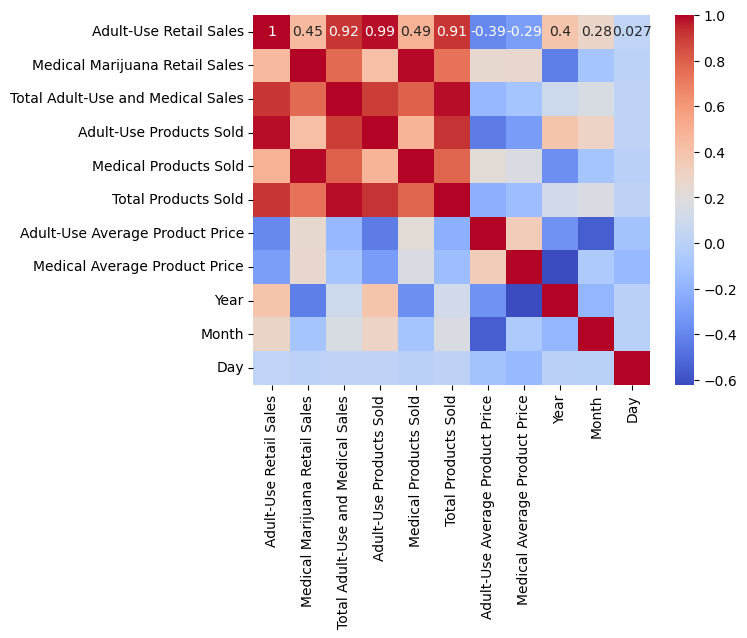

In [4]:
# Summary statistics
print(Cannibas_Sales_df.describe())

# Correlation matrix
print(Cannibas_Sales_df.corr())

# Plotting the correlation matrix
import seaborn as sns
sns.heatmap(Cannibas_Sales_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Step 5: Feature Engineering

Feature engineering involves creating new features or transforming existing ones to improve the model's performance.

In [5]:
# Create a new feature: Total Products Sold per Week
Cannibas_Sales_df['Total Products Sold per Week'] = Cannibas_Sales_df['Adult-Use Products Sold'] + Cannibas_Sales_df['Medical Products Sold']

# Display the first few rows after feature engineering
print(Cannibas_Sales_df.head())

   Adult-Use Retail Sales  Medical Marijuana Retail Sales  \
0              1485019.32                      1776700.69   
1              1487815.81                      2702525.61   
2              1553216.30                      2726237.56   
3               578840.62                       863287.86   
4              1047436.20                      1971731.40   

   Total Adult-Use and Medical Sales  Adult-Use Products Sold  \
0                         3261720.01                    33610   
1                         4190341.42                    33005   
2                         4279453.86                    34854   
3                         1442128.48                    12990   
4                         3019167.60                    24134   

   Medical Products Sold  Total Products Sold  \
0                  49312                82922   
1                  77461               110466   
2                  76450               111304   
3                  24023                37013 

## Step 6: Splitting the Data

Split the data into training and testing sets

In [6]:
# Define features (X) and target (y)
X = Cannibas_Sales_df.drop(['Total Adult-Use and Medical Sales'], axis=1)
y = Cannibas_Sales_df['Total Adult-Use and Medical Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(103, 11) (26, 11)


## Step 7: Model Selection and Training

Choose a model and train it on the training data. For simplicity, we'll use a Linear Regression model.

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Step 8: Model Evaluation

Evaluate the model's performance on the test data.

Mean Squared Error: 346692.3760245455


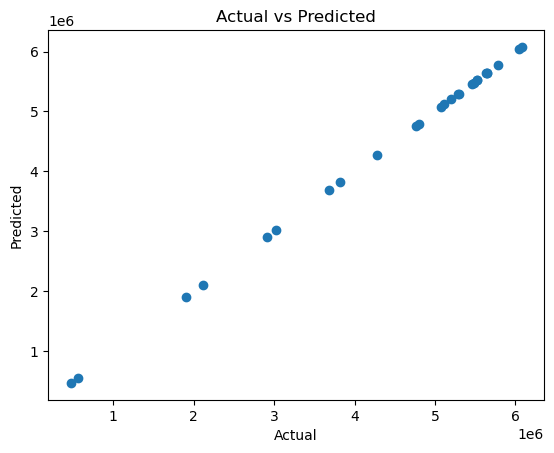

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Step 9: Making Predictions

You can now use the trained model to make predictions on new data.

In [12]:
# Example: Predict on new data
new_data = pd.DataFrame({
    'Adult-Use Retail Sales': [1500000],
    'Medical Marijuana Retail Sales': [1800000],
    'Adult-Use Products Sold': [30000],
    'Medical Products Sold': [50000],
    'Total Products Sold': [80000],
    'Adult-Use Average Product Price': [40],
    'Medical Average Product Price': [35],
    'Year': [2024],
    'Month': [1],
    'Day': [15],
    'Total Products Sold per Week': [80000]
})

# Save the model to a file
joblib.dump(model, 'cannabis_sales_model.pkl')

predicted_sales = model.predict(new_data)
print(f'Predicted Total Sales: {predicted_sales[0]}')



Predicted Total Sales: 3300001.5161294458


## Summary

Import Libraries: Import necessary libraries like Pandas, NumPy, and Scikit-learn.

Load Data: Load the dataset into a Pandas DataFrame.

Preprocess Data: Handle missing values, convert data types, and create new features.

EDA: Perform exploratory data analysis to understand the data.

Feature Engineering: Create new features or transform existing ones.

Split Data: Split the data into training and testing sets.

Train Model: Choose a model and train it on the training data.

Evaluate Model: Evaluate the model's performance on the test data.

Make Predictions: Use the trained model to make predictions on new data